## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head())
df.tail()

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164


,DATE,TAG,POSTS
2519,2023-09-01 00:00:00,php,1698
2520,2023-09-01 00:00:00,python,8776
2521,2023-09-01 00:00:00,r,2051
2522,2023-09-01 00:00:00,ruby,192
2523,2023-09-01 00:00:00,swift,887


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2524
TAG      2524
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
g_df = df.groupby("TAG").sum()
print(g_df)
g_df.idxmax()

              POSTS
TAG                
assembly      43314
c            399407
c#          1601769
c++          798911
delphi        51260
go            70849
java        1905406
javascript  2509742
perl          67857
php         1459959
python      2160111
r            497052
ruby         228391
swift        329879


/tmp/ipykernel_9156/1310442071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g_df = df.groupby("TAG").sum()


POSTS    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [10]:
print(df.DATE[1])
type(df["DATE"][1])

2008-08-01 00:00:00


str

In [11]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [12]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [13]:
test_df = pd.DataFrame({"Age": ["young", "young", "young", "young", "old", "old", "old", "old"],
"Actor": ["Jack", "Arnold", "Keanu", "Sylvester", "Jack", "Arnold", "Keanu", "Sylvester"],
"Power": [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,young,Jack,100
1,young,Arnold,80
2,young,Keanu,25
3,young,Sylvester,50
4,old,Jack,99
5,old,Arnold,75
6,old,Keanu,5
7,old,Sylvester,30


In [14]:
test_df.pivot(index="Age", columns="Actor", values="Power")

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
old,75,99,5,30
young,80,100,25,50


In [15]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1048.0,3830.0,1779.0,114.0,418.0,4174.0,7767.0,54.0,1970.0,11796.0,2864.0,255.0,996.0
2023-06-01,155.0,890.0,3802.0,1815.0,117.0,520.0,4291.0,7523.0,54.0,1900.0,11273.0,2663.0,226.0,1132.0
2023-07-01,161.0,917.0,3882.0,1853.0,99.0,524.0,4070.0,7541.0,69.0,1744.0,11156.0,2363.0,224.0,1156.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [16]:
reshaped_df.shape

(183, 14)

In [17]:
print(reshaped_df.head())
reshaped_df.tail()

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   505.0  164.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  320.0  1640.0  755.0   104.0 NaN  1129.0       634.0   
2008-10-01      16.0  303.0  1988.0  807.0   112.0 NaN  1149.0       722.0   
2008-11-01      16.0  258.0  1731.0  734.0   141.0 NaN   955.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  158.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  475.0   538.0  6.0  286.0    NaN  
2008-10-01  128.0  610.0   506.0  NaN  247.0    NaN  
2008-11-01   97.0  499.0   449.0  1.0  157.0    NaN  


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-05-01,174.0,1048.0,3830.0,1779.0,114.0,418.0,4174.0,7767.0,54.0,1970.0,11796.0,2864.0,255.0,996.0
2023-06-01,155.0,890.0,3802.0,1815.0,117.0,520.0,4291.0,7523.0,54.0,1900.0,11273.0,2663.0,226.0,1132.0
2023-07-01,161.0,917.0,3882.0,1853.0,99.0,524.0,4070.0,7541.0,69.0,1744.0,11156.0,2363.0,224.0,1156.0
2023-08-01,144.0,869.0,3659.0,1670.0,106.0,495.0,3847.0,6818.0,48.0,1786.0,10293.0,2359.0,201.0,980.0
2023-09-01,159.0,888.0,3103.0,1524.0,105.0,433.0,3415.0,5833.0,63.0,1698.0,8776.0,2051.0,192.0,887.0


In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [19]:
reshaped_df.count()

TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [20]:
reshaped_df.fillna(0, inplace=True)

In [21]:
print(reshaped_df.head())
reshaped_df.isna().values.any()

TAG         assembly      c      c#    c++  delphi   go    java  javascript  \
DATE                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   83.0   505.0  164.0    14.0  0.0   222.0       163.0   
2008-09-01      28.0  320.0  1640.0  755.0   104.0  0.0  1129.0       634.0   
2008-10-01      16.0  303.0  1988.0  807.0   112.0  0.0  1149.0       722.0   
2008-11-01      16.0  258.0  1731.0  734.0   141.0  0.0   955.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  158.0   120.0  0.0   70.0    0.0  
2008-09-01  130.0  475.0   538.0  6.0  286.0    0.0  
2008-10-01  128.0  610.0   506.0  0.0  247.0    0.0  
2008-11-01   97.0  499.0   449.0  1.0  157.0    0.0  


False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

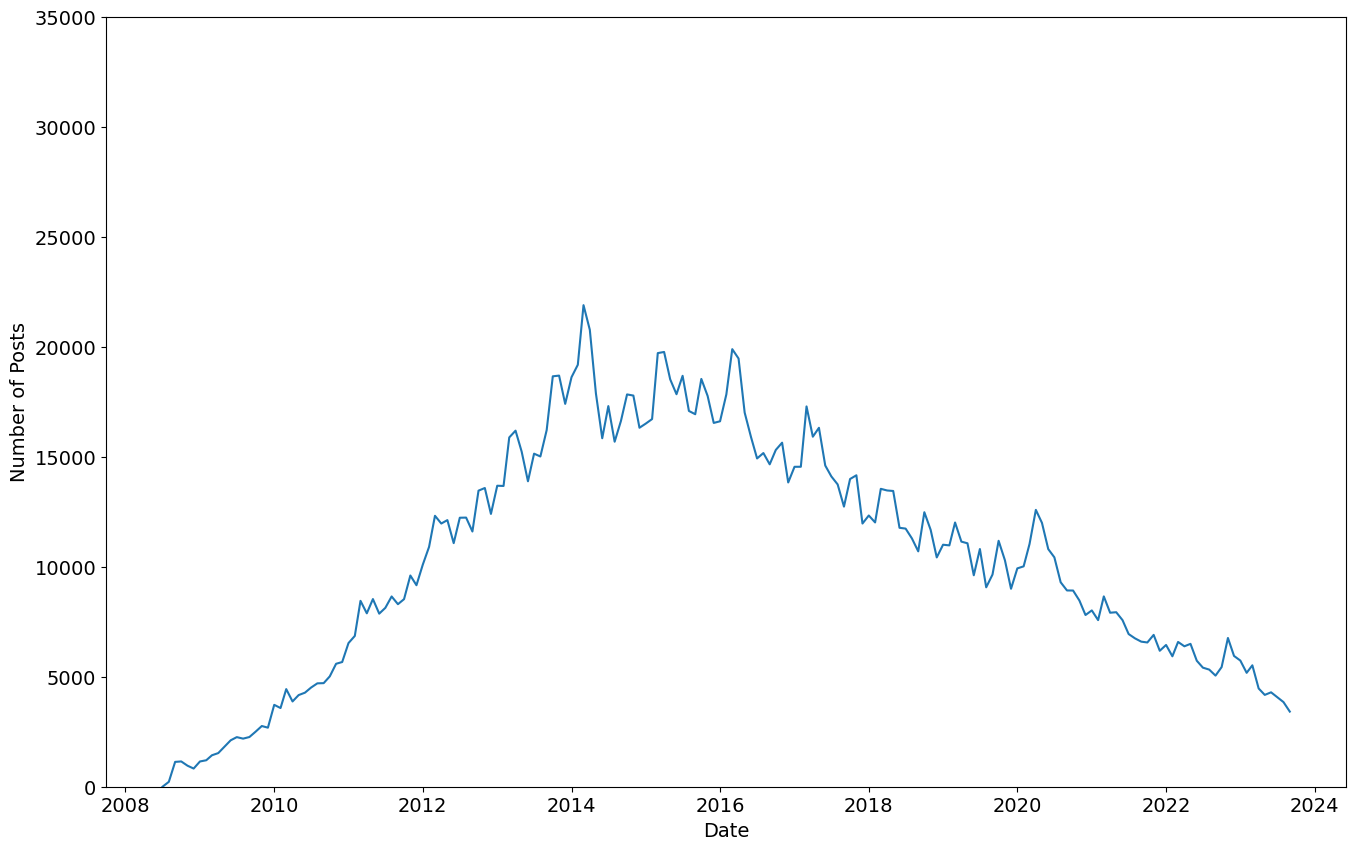

In [42]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])

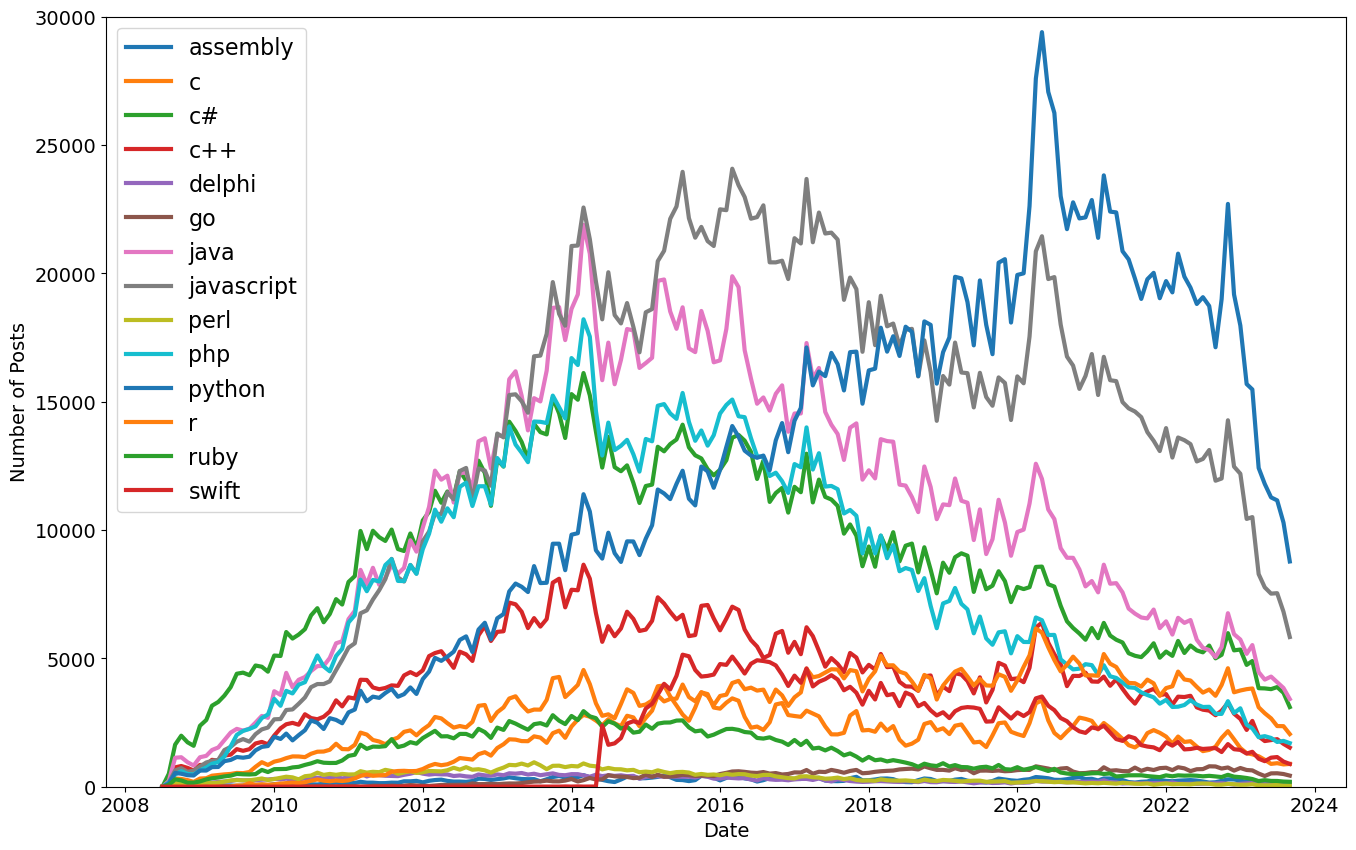

In [56]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 30000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
for i in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[i], linewidth=3,
             label=reshaped_df[i].name)
plt.legend(fontsize=16)

assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

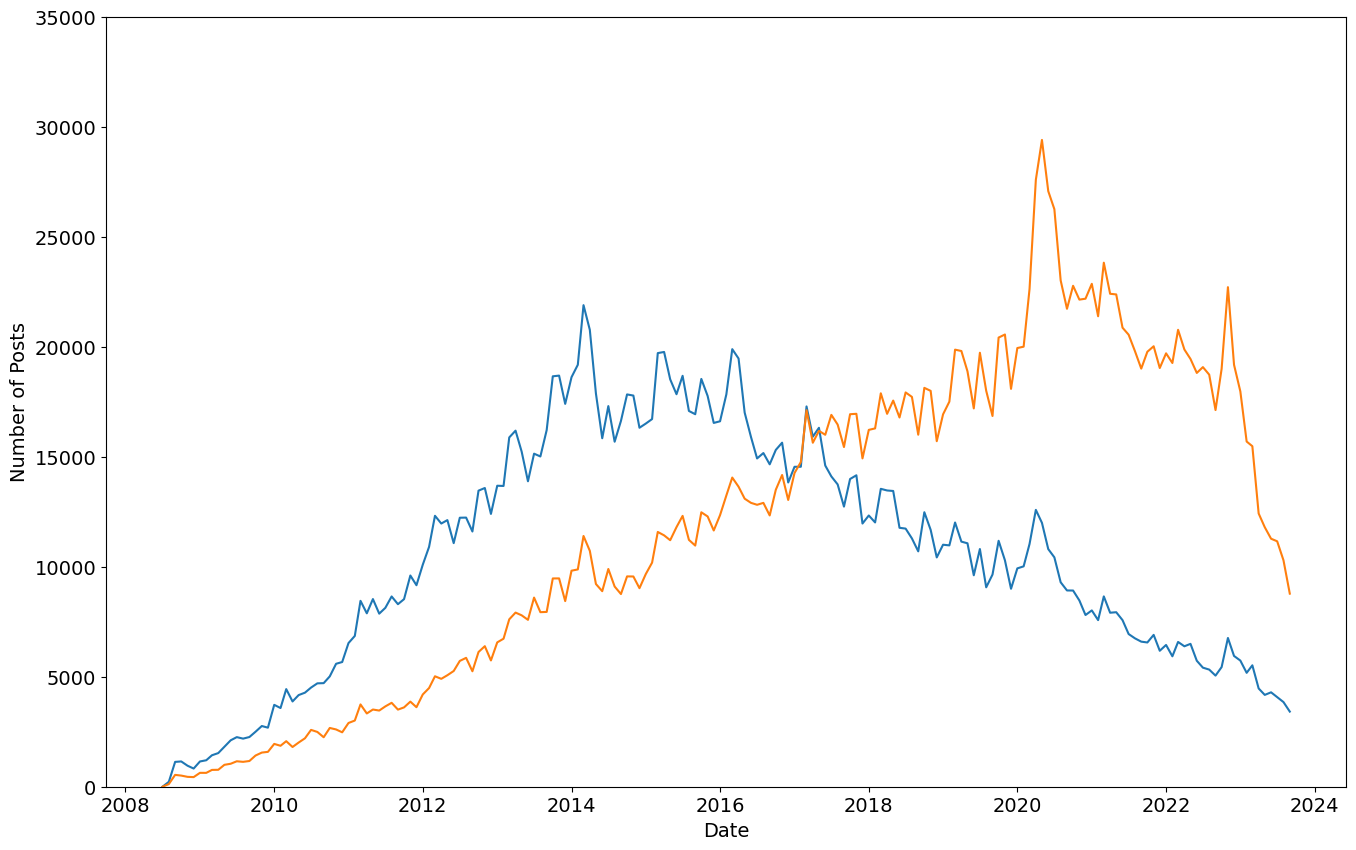

In [45]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

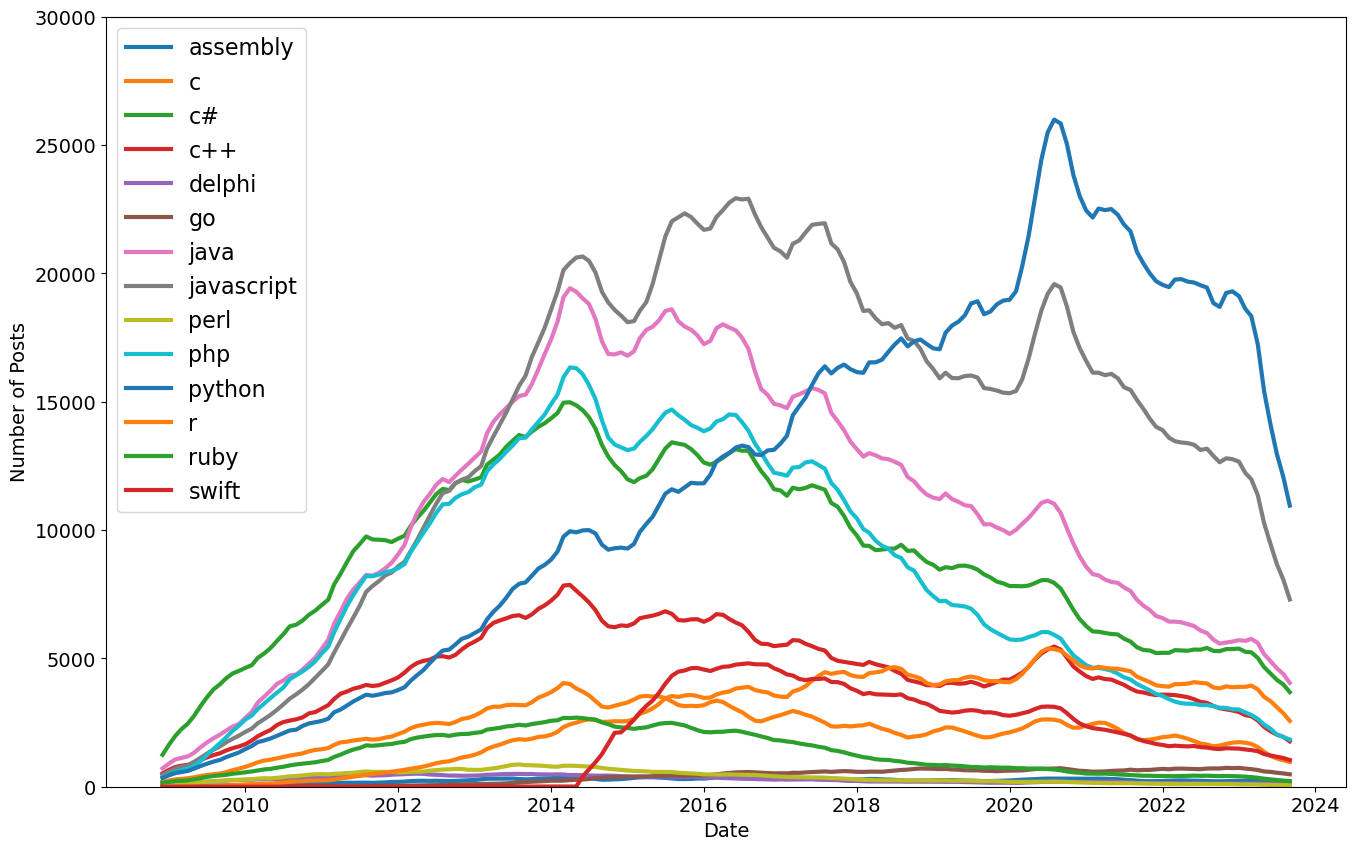

In [60]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 30000)

# Plot the roll_df
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)